In [1]:
## Load and Explore the Dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Reviews.csv'  
df = pd.read_csv(file_path)
data= pd.read_csv(file_path)
# Display basic information and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                        

In [3]:
## Analyze the Scores

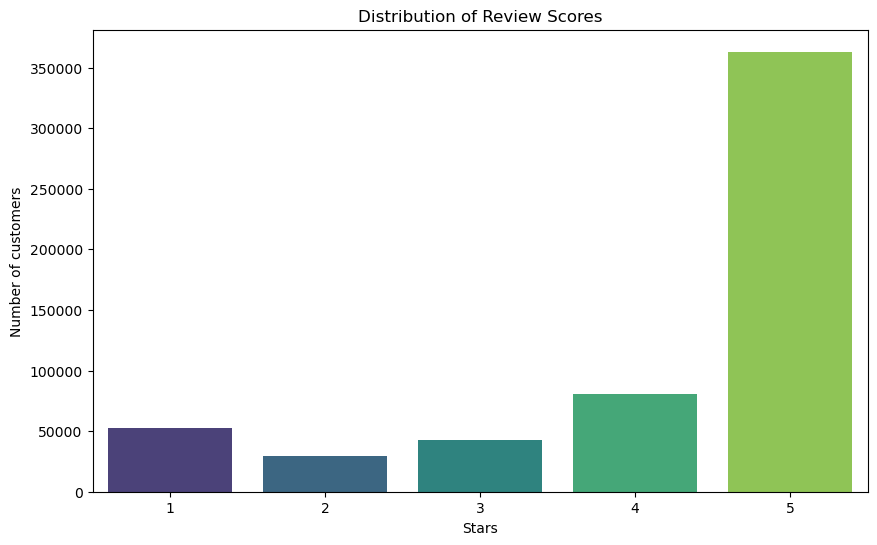

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze score distribution
score_counts = df['Score'].value_counts().sort_index()

# Plot the score distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Stars")
plt.ylabel("Number of customers")
plt.show()


In [5]:
## So we have 64% "5 *" reviews followed by 13% "4 *" and 10% "1*" reviews

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
## Preprocess Text for Sentiment Analysis

In [20]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combine 'Summary' and 'Text'
df['combined_text'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

# Define a text preprocessing function
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function
df['cleaned_text'] = df['combined_text'].apply(clean_text)

In [26]:
## Perform Sentiment Analysis

In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['sentiment_scores'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiments
df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')

# Display sentiment counts
print(df['sentiment'].value_counts())


sentiment
positive    518311
negative     42094
neutral       8049
Name: count, dtype: int64


In [34]:
## Visualize Sentiment Analysis Results

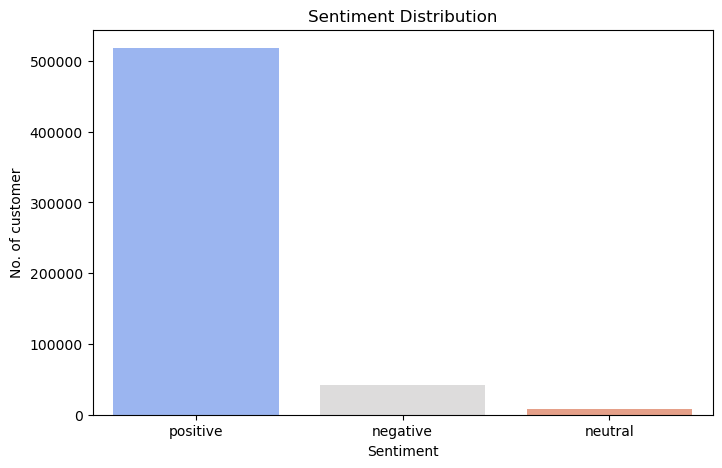

In [36]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("No. of customer")
plt.show()

In [38]:
## Derive Insights

In [40]:
from collections import Counter

# Function to get word frequencies
def get_word_frequencies(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    word_freq = Counter(text.split())
    return word_freq.most_common(20)

# Get most common words for positive and negative sentiments
positive_words = get_word_frequencies('positive')
negative_words = get_word_frequencies('negative')

print("Top Positive Words:", positive_words)
print("Top Negative Words:", negative_words)

Top Positive Words: [('br', 254526), ('like', 247428), ('good', 237891), ('great', 233011), ('coffee', 172700), ('taste', 168733), ('one', 163386), ('love', 151313), ('product', 148665), ('flavor', 146879), ('tea', 145562), ('food', 126103), ('would', 113243), ('best', 107294), ('get', 102388), ('really', 99115), ('much', 89177), ('dont', 89030), ('little', 82470), ('also', 81258)]
Top Negative Words: [('br', 16444), ('like', 16204), ('product', 15393), ('taste', 13866), ('one', 13104), ('coffee', 10835), ('would', 10255), ('food', 9829), ('dont', 9497), ('bad', 9345), ('tea', 8330), ('good', 8058), ('flavor', 8006), ('get', 7612), ('buy', 7185), ('even', 7095), ('really', 6196), ('dog', 5985), ('time', 5879), ('box', 5756)]


In [42]:
df.to_csv('processed_amazon_reviews.csv', index=False)

In [44]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,combined_text,cleaned_text,sentiment_scores,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...,good quality dog food bought several vitality ...,0.9565,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...,advertised product arrived labeled jumbo salte...,-0.1027,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha...",delight says confection around centuries light...,0.9042,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...,cough medicine looking secret ingredient robit...,0.4404,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...,great taffy great taffy great price wide assor...,0.9661,positive
